# Data Wrangling

## Load Data & Package

In [207]:
# Library
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla
import streamlit as st
import time
from sklearn.decomposition import PCA
from scipy import stats
import sys
import io
from babel.numbers import format_currency
import matplotlib.dates as mdates
from PIL import Image

In [166]:
# Data day
day_df = pd.read_csv("https://raw.githubusercontent.com/Zen-Rofiqy/Bangkit-2024/main/04%20Analisis%20Data%20dng%20Py/%40Proyek-akhir/Bike-sharing-dataset/day.csv")
day_df.head(n=10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
# Data Hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/Zen-Rofiqy/Bangkit-2024/main/04%20Analisis%20Data%20dng%20Py/%40Proyek-akhir/Bike-sharing-dataset/hour.csv")
hour_df.head(n=10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Metadata
> Latarbelakang

**_Bike sharing_** atau Sistem berbagi sepeda adalah generasi baru dari **penyewaan sepeda tradisional** di mana seluruh proses mulai dari **keanggotaan**, **penyewaan**, dan **pengembalian** sepeda menjadi **otomatis**. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat **lebih dari 500 program** berbagi sepeda di seluruh dunia yang terdiri dari **lebih dari 500k sepeda**. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan. 

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, **karakteristik data** yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, **durasi perjalanan**, **posisi keberangkatan** dan **kedatangan secara eksplisit** dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi **jaringan sensor virtual** yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

> Data set

Proses penyewaan sepeda bersama sangat **berkorelasi** dengan **kondisi lingkungan** dan **musim**. Misalnya, **kondisi cuaca**, **curah hujan**, **hari dalam seminggu**, **musim**, **jam dalam sehari**, dan lain-lain dapat mempengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis selama **dua tahun** yang berkaitan dengan tahun **2011** dan **2012** dari sistem Capital Bikeshare, Washington D.C., Amerika Serikat yang tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data tersebut dalam dua basis data **per jam** dan **per hari**, kemudian mengekstrak dan menambahkan **informasi cuaca** dan **musim** yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

> Tugas terkait
* **Regresi**: 
	**Prediksi jumlah penyewaan sepeda** per jam atau per hari **berdasarkan pengaturan lingkungan dan musim**.
	
* **Deteksi Peristiwa dan Anomali**:  
	**Jumlah sepeda yang disewa** juga **berkorelasi** dengan beberapa **peristiwa di kota** yang dapat dengan mudah ditelusuri melalui mesin pencari.	Sebagai contoh, kueri seperti "2012-10-30 washington d.c." di Google mengembalikan hasil yang terkait dengan **Badai Sandy**. Beberapa peristiwa penting diidentifikasi dalam [1]. Oleh karena itu, data tersebut dapat digunakan untuk **validasi algoritma** **pendeteksi anomali atau kejadian**.

> Karakteristik Dataset

Baik hour.csv dan day.csv memiliki bidang berikut, kecuali hr yang tidak tersedia di day.csv
	
* `instant`    : indeks catatan
* `dteday`     : tanggal
* `season`     : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
* `yr`         : tahun (0: 2011, 1: 2012)
* `mnth`       : bulan (1 hingga 12)
* `hr`         : jam (0 hingga 23)
* `holiday`    : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
* `weekday`    : hari dalam seminggu
* `workingday` : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
* `weathersit` : 
	- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
	- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
	- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
	- 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut
* `temp`       : Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
* `atemp`      : Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
* `hum`        : Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
* `windspeed`  : Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
* `casual`     : jumlah pengguna biasa
* `registered` : jumlah pengguna terdaftar
* `cnt`        : jumlah total sepeda yang disewa termasuk yang kasual dan terdaftar


## Assessing Data

### Menilai Data `day_df`

Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df`. Proses ini dapat dilakukan menggunakan method `info()` seperti contoh kode berikut.

In [205]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(4), datetime64

Jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Juga tidak ada perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan tidak adanya missing values pada semua kolom atau peubah.

#### Mengecek Missing Value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memang terbukti bahwa tidak ada missing value pada data`day_df`.

#### Mengecek statistik deksriptif

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memang akan sedikit sulit untuk menilai data dari statistik deskriptif nya. Agak lebih mudah dalam menilainya, akan dilakukan visualisasi data untuk eksplorasi data.

### Menilai Data `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti `day_df`, jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Juga tidak ada perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan tidak adanya missing values pada semua kolom atau peubah. 

Maka dari kedua data yang ada, tidak perlu dilakukan proses *cleaning data*. Hanya saja mungkin jika ingin mengubah kode seperti 0, 1, 2.. mungkin bisa diubah agar bisa lebih terlihat dengan jelas. Lalu juga seperti peubah `windspeed`, `hum` yang telah dinormalisasi, mungkin bisa dikembalikan agar mudah mengidentifikasikannya.

 ### Ubah kode

In [202]:
data = pd.DataFrame(day_df)

data['season'] = data['season'].replace({1: 'M Semi', 2: 'M Panas', 3:"M Gugur", 4:"M Dingin"})
data['yr'] = data['yr'].replace({0: '2011', 1: '2012'})
data['holiday'] = data['holiday'].replace({0: 'H Kerja', 1: 'H Libur'})
data['weekday'] = data['weekday'].replace({0: 'Senin', 1: 'Selasa', 2:'Rabu', 3:'Kamis', 4:"Jum'at", 5:"Sabtu", 6:"Minggu"})
data['weathersit'] = data['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3:'Salju Ringan', 4:'Hujan Lebat'})
data['windspeed'] = data['windspeed']*67
data['hum'] = data['hum']*100
data['temp'] = data['temp']*41
data['season']= data['season'].astype('category')
data['yr']= data['yr'].astype('category')
data['weekday']= data['weekday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
data['dteday'] = pd.to_datetime(data['dteday'])
data.head(n=10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,M Semi,2011,1,H Kerja,Minggu,0,Berkabut,14.110847,0.363625,80.5833,10.749882,331,654,985
1,2,2011-01-02,M Semi,2011,1,H Kerja,Senin,0,Berkabut,14.902598,0.353739,69.6087,16.652113,131,670,801
2,3,2011-01-03,M Semi,2011,1,H Kerja,Selasa,1,Cerah,8.050924,0.189405,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,M Semi,2011,1,H Kerja,Rabu,1,Cerah,8.200000,0.212122,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,M Semi,2011,1,H Kerja,Kamis,1,Cerah,9.305237,0.229270,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,M Semi,2011,1,H Kerja,Jum'at,1,Cerah,8.378268,0.233209,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,M Semi,2011,1,H Kerja,Sabtu,1,Berkabut,8.057402,0.208839,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,M Semi,2011,1,H Kerja,Minggu,0,Berkabut,6.765000,0.162254,53.5833,17.875868,68,891,959
8,9,2011-01-09,M Semi,2011,1,H Kerja,Senin,0,Cerah,5.671653,0.116175,43.4167,24.250650,54,768,822
9,10,2011-01-10,M Semi,2011,1,H Kerja,Selasa,1,Cerah,6.184153,0.150888,48.2917,14.958889,41,1280,1321


## Eksplorasi Data

### Pivot by season

In [15]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa banyaknya hari didominasi pada musim gugur (musim 3), namun perbedaan antar musimnya tidak terlalu jauh. Di lain sisi, distribusi jumlah total sepeda yang diswewa (`cnt`) ternyata cukup beragam pada batas bawah atau nilai minimalnya. Sedangkan pada batas atas atau nilai maximalnya cenderung mirip.

In [16]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

Berbeda dengan `day_df` distribusi jumlah total sepeda yang diswewa (`cnt`) ternyata cukup mirip yakni berkisar 1 hingga 970 sepeda, kecuali pada musim semi (musim 1).

### Sebaran Data

#### Musim

C:\Users\Fathan\AppData\Local\Temp\ipykernel_170796\2211632474.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



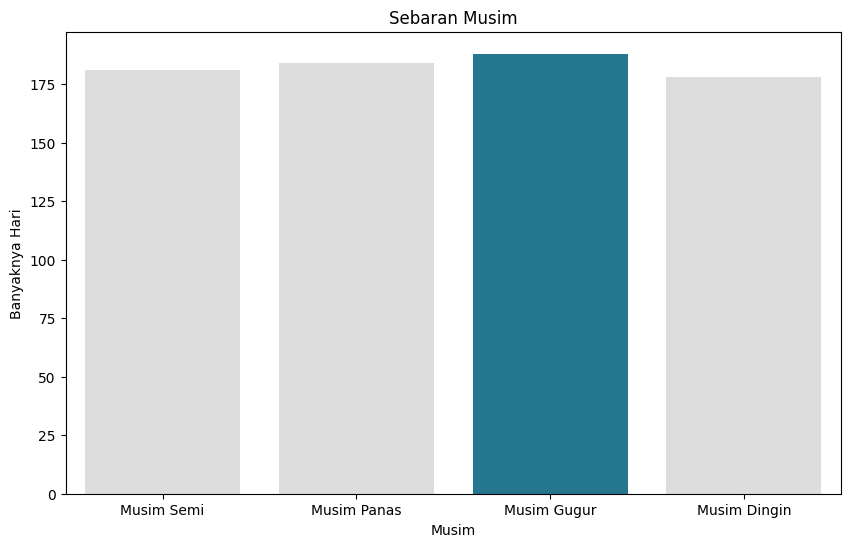

In [98]:
# Mendapatkan musim dengan jumlah data terbanyak
max_season = day_df['season'].value_counts().idxmax()
categories = day_df['season'].unique()
cols = ['#1380A1' if (x == max_season) else '#dddddd' for x in categories]

season_names = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']

# Membuat countplot untuk musim
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=day_df, order=categories, palette=cols)
plt.title('Sebaran Musim')
plt.xlabel('\nMusim')
plt.ylabel('Banyaknya Hari')

# Mengatur label pada sumbu x
plt.xticks(ticks=range(len(categories)), labels=season_names)

plt.show()

#### Hari libur

C:\Users\Fathan\AppData\Local\Temp\ipykernel_170796\3473231616.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



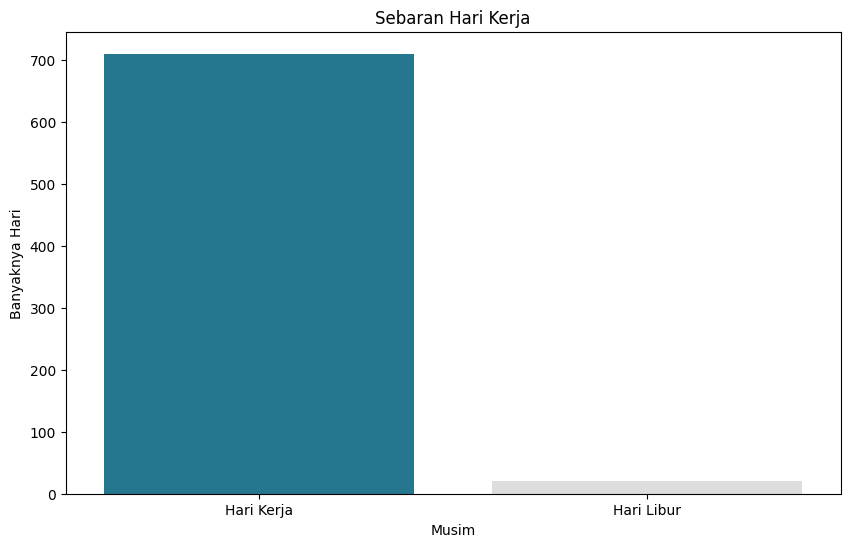

In [100]:
# Mendapatkan musim dengan jumlah data terbanyak
max_season = day_df['holiday'].value_counts().idxmax()
categories = day_df['holiday'].unique()
cols = ['#1380A1' if (x == max_season) else '#dddddd' for x in categories]

names = ['Hari Kerja', 'Hari Libur']

# Membuat countplot untuk musim
plt.figure(figsize=(10, 6))
sns.countplot(x='holiday', data=day_df, order=categories, palette=cols)
plt.title('Sebaran Hari Kerja')
plt.xlabel('\nHari libur')
plt.ylabel('Banyaknya Hari')

# Mengatur label pada sumbu x
plt.xticks(ticks=range(len(categories)), labels=names)

plt.show()

#### Cuaca

C:\Users\Fathan\AppData\Local\Temp\ipykernel_170796\1815743998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



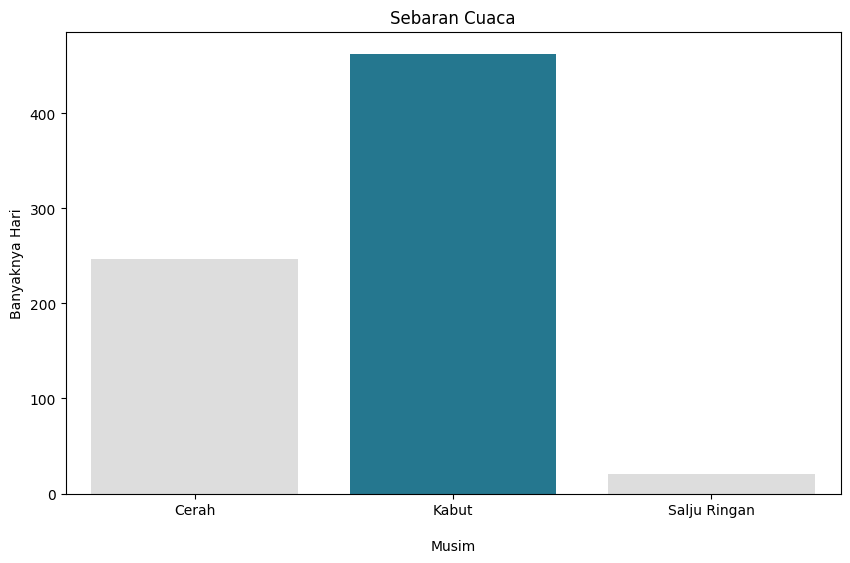

In [104]:
# Mendapatkan musim dengan jumlah data terbanyak
max_season = day_df['weathersit'].value_counts().idxmax()
categories = day_df['weathersit'].unique()
cols = ['#1380A1' if (x == max_season) else '#dddddd' for x in categories]

names = ['Cerah', 'Berkabut', 'Salju Ringan'] #Gak ada hujan lebat dalam data

# Membuat countplot untuk musim
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', data=day_df, order=categories, palette=cols)
plt.title('Sebaran Cuaca')
plt.xlabel('\nCuaca')
plt.ylabel('Banyaknya Hari')

# Mengatur label pada sumbu x
plt.xticks(ticks=range(len(categories)), labels=names)

plt.show()

In [103]:
#cek apakah benar tidak ada hujan lebat dalam data
pd.Series(day_df['weathersit']).value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

#### Temperatur

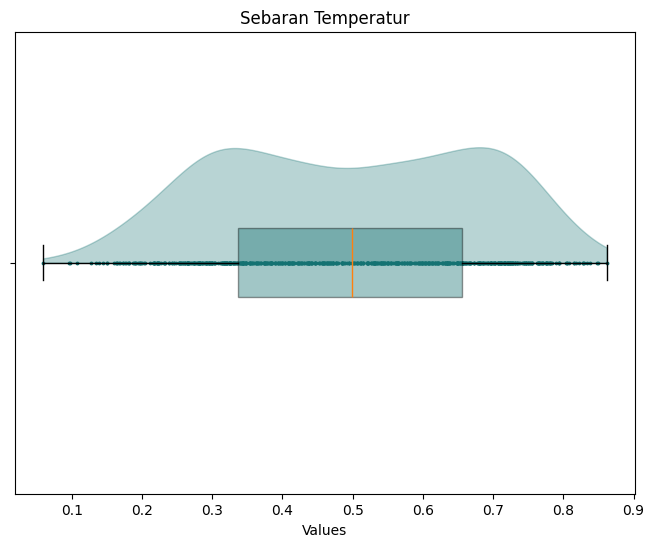

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#147272']

# Boxplot data
bp = ax.boxplot(day_df['temp'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#147272']

# Violinplot data
vp = ax.violinplot(day_df['temp'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#147272']

# Scatterplot data
plt.scatter(day_df['temp'], np.ones(len(day_df['temp'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Temperatur")
plt.show()

#### Suhu perasaan

Suhu/temperatur lingkungan yang dirasakan oleh orang. 

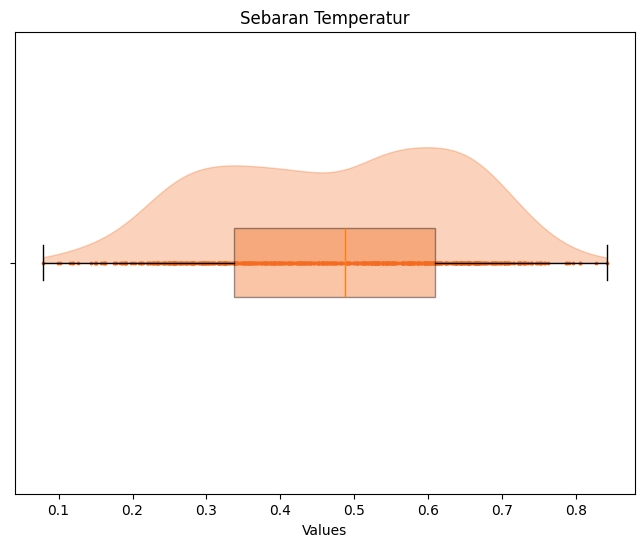

In [144]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#F36C21']

# Boxplot data
bp = ax.boxplot(day_df['atemp'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#F36C21']

# Violinplot data
vp = ax.violinplot(day_df['atemp'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#F36C21']

# Scatterplot data
plt.scatter(day_df['atemp'], np.ones(len(day_df['atemp'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Suhu Perasaan")
plt.show()

#### Kelembapan

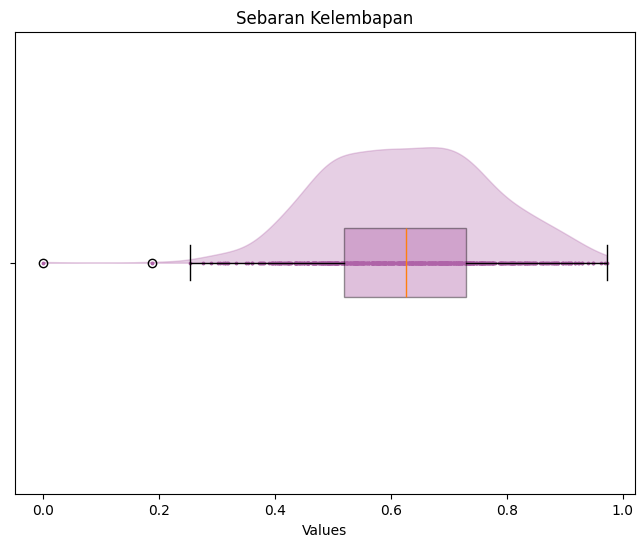

In [145]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#AF63A8']

# Boxplot data
bp = ax.boxplot(day_df['hum'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#AF63A8']

# Violinplot data
vp = ax.violinplot(day_df['hum'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#AF63A8']

# Scatterplot data
plt.scatter(day_df['hum'], np.ones(len(day_df['hum'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Kelembapan")
plt.show()

#### Kecepatan Angin

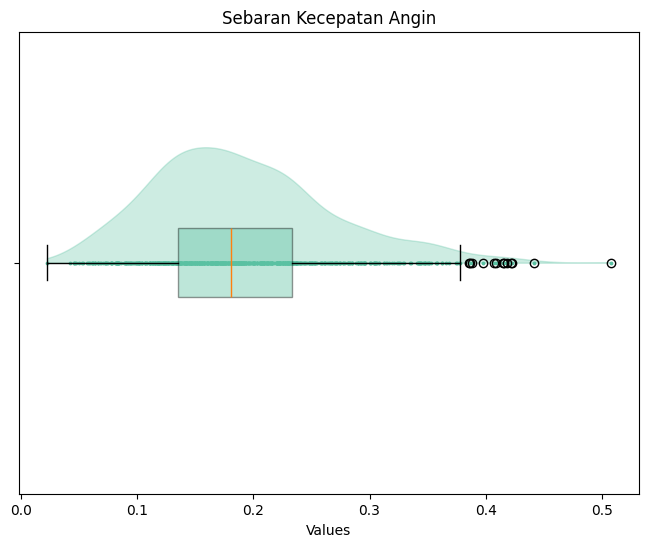

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#5AC1A2']

# Boxplot data
bp = ax.boxplot(day_df['windspeed'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#5AC1A2']

# Violinplot data
vp = ax.violinplot(day_df['windspeed'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#5AC1A2']

# Scatterplot data
plt.scatter(day_df['windspeed'], np.ones(len(day_df['windspeed'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Kecepatan Angin")
plt.show()

#### Jumlah Pengguna Biasa

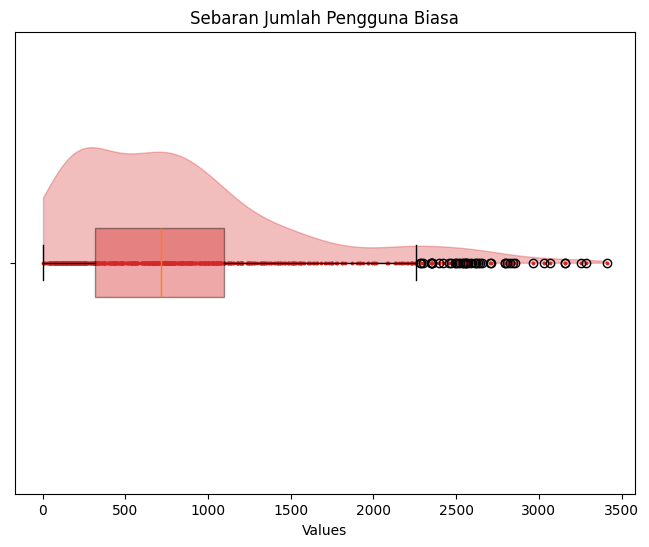

In [147]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#D52727']

# Boxplot data
bp = ax.boxplot(day_df['casual'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#D52727']

# Violinplot data
vp = ax.violinplot(day_df['casual'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#D52727']

# Scatterplot data
plt.scatter(day_df['casual'], np.ones(len(day_df['casual'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Jumlah Pengguna Biasa")
plt.show()

#### Jumlah pengguna terdaftar

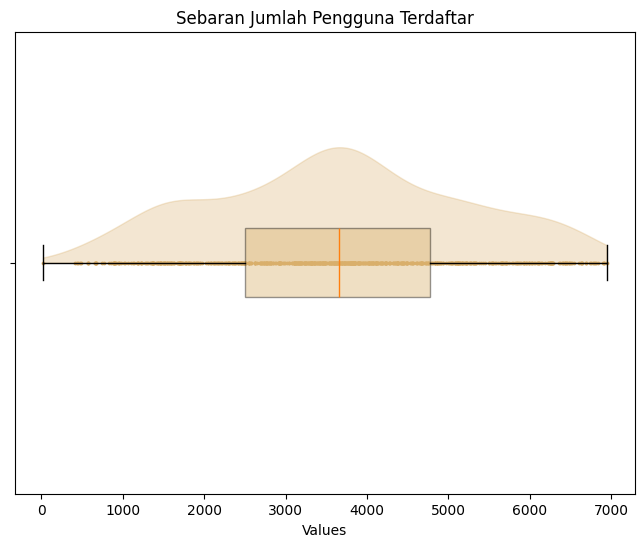

In [148]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#D9AF6B']

# Boxplot data
bp = ax.boxplot(day_df['registered'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#D9AF6B']

# Violinplot data
vp = ax.violinplot(day_df['registered'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#D9AF6B']

# Scatterplot data
plt.scatter(day_df['registered'], np.ones(len(day_df['registered'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Jumlah Pengguna Terdaftar")
plt.show()

#### Jumlah Total sepeda yang disewa (kasual dan terdafar)

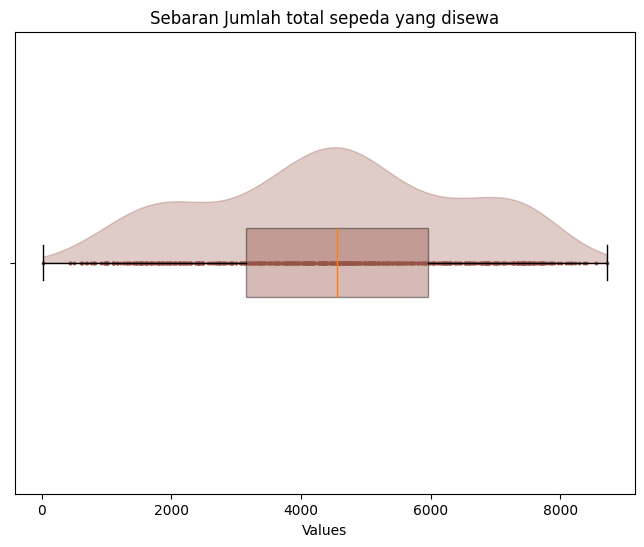

In [149]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#975348']

# Boxplot data
bp = ax.boxplot(day_df['cnt'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#975348']

# Violinplot data
vp = ax.violinplot(day_df['cnt'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#975348']

# Scatterplot data
plt.scatter(day_df['cnt'], np.ones(len(day_df['cnt'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Jumlah total sepeda yang disewa")
plt.show()

### Sebaran ver2

In [199]:
def plot_disk(data_frame, column, names=None):
    # Mendapatkan kategori unik dan warna untuk plot
    max_value = data_frame[column].value_counts().idxmax()
    categories = data_frame[column].unique()
    colors = ['#1380A1' if x == max_value else '#dddddd' for x in categories]

    # Mendapatkan nama kategori
    category_names = [str(cat) for cat in categories]
    if names:
        category_names = names

    # Membuat countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data_frame, order=categories, palette=colors)
    plt.title(f'Sebaran {column}')
    plt.xlabel(f'\n{column}')
    plt.ylabel('Banyaknya Hari')

    # Mengatur label pada sumbu x
    plt.xticks(ticks=range(len(categories)), labels=category_names)

    # Menyimpan plot dalam variabel
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Menutup plot untuk plot selanjutnya
    plt.close()

    return buffer

# Menyimpan plot 
# Disktrit
c_season = plot_disk(day_df, 'season', names=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
c_holiday = plot_disk(day_df, 'holiday', names=['Hari Kerja', 'Hari Libur'])
c_weathersit = plot_disk(day_df, 'weathersit', names=['Cerah', 'Berkabut', 'Salju Ringan'])


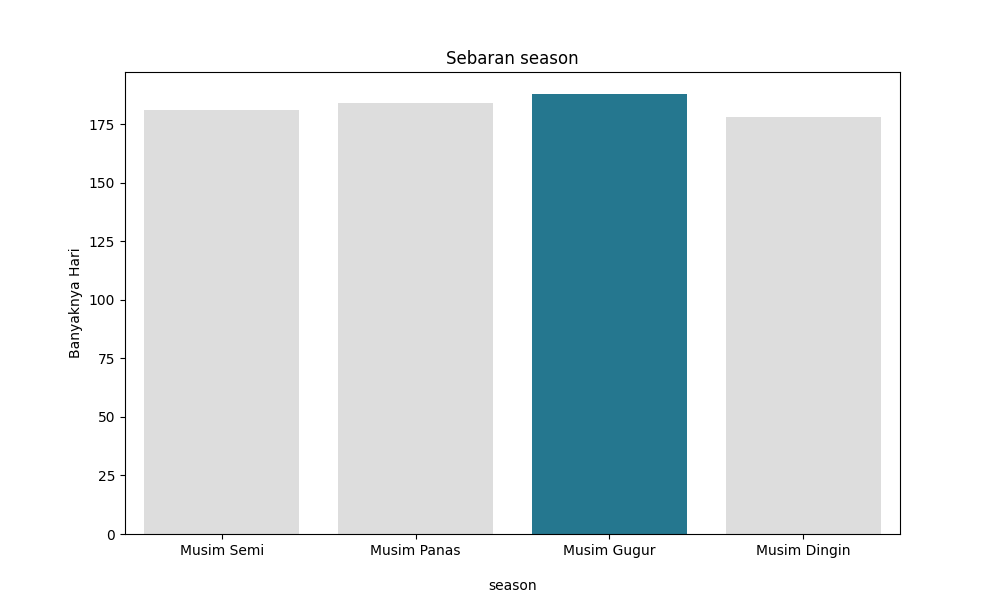

In [201]:
display(Image(c_season.getvalue()))

In [195]:
def plot_kon(data_frame, column):
    # Membuat subplots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['#5AC1A2']

    # Boxplot data
    bp = ax.boxplot(data_frame[column], patch_artist=True, vert=False)

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['#5AC1A2']

    # Violinplot data
    vp = ax.violinplot(data_frame[column], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])

    # Create a list of colors for the scatter plots based on the number of features you have
    scatter_colors = ['#5AC1A2']

    # Scatterplot data
    plt.scatter(data_frame[column], np.ones(len(data_frame[column])), s=3, c=scatter_colors[0])

    plt.yticks([1], [''])  # Set text labels.
    plt.xlabel('Values')
    plt.title(f"Sebaran {column}")

    # Menyimpan plot dalam variabel
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Menutup plot untuk plot selanjutnya
    plt.close()

    return buffer


# Kontinu
c_temp = plot_kon(day_df, 'temp')
c_atemp = plot_kon(day_df, 'atemp')
c_hum = plot_kon(day_df, 'hum')
c_windspeed = plot_kon(day_df, 'windspeed')
c_casual = plot_kon(day_df, 'casual')
c_registered = plot_kon(day_df, 'registered')
c_cnt = plot_kon(day_df, 'cnt')

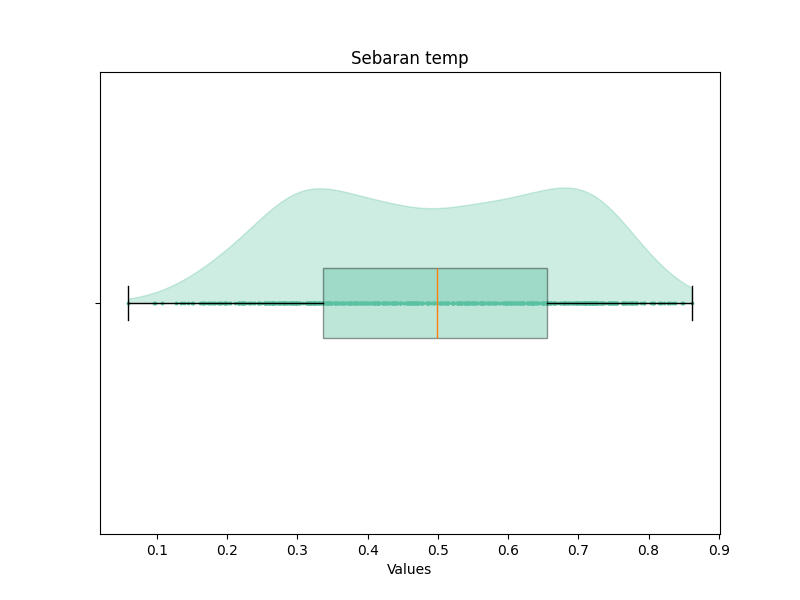

In [196]:
display(Image(c_temp.getvalue()))

### Time Series

In [163]:
# Convert 'dteday' to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Set 'dteday' as index
day_df.set_index('dteday', inplace=True)

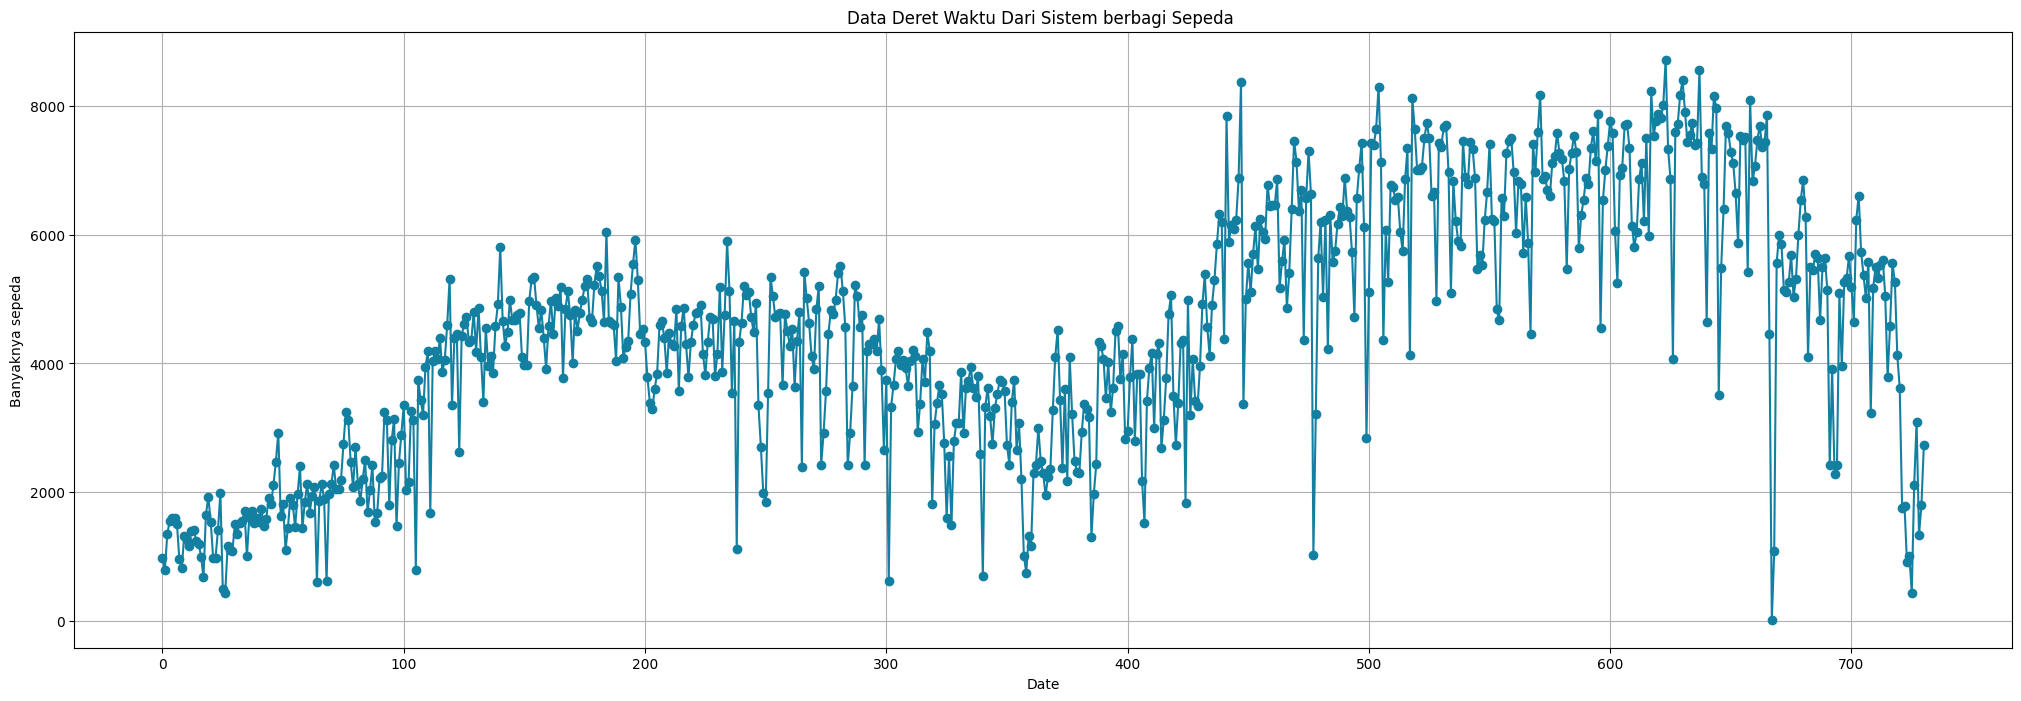

In [171]:
# Plot the time series
plt.figure(figsize=(25, 8))
plt.plot(day_df.index, day_df['cnt'], marker='o', linestyle='-', color='#1380A1')
plt.title('Data Deret Waktu Dari Sistem berbagi Sepeda ')
plt.xlabel('Date')
plt.ylabel('Banyaknya sepeda')
plt.grid(True)
plt.show()

### Matriks Korelasi
Ref : https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another

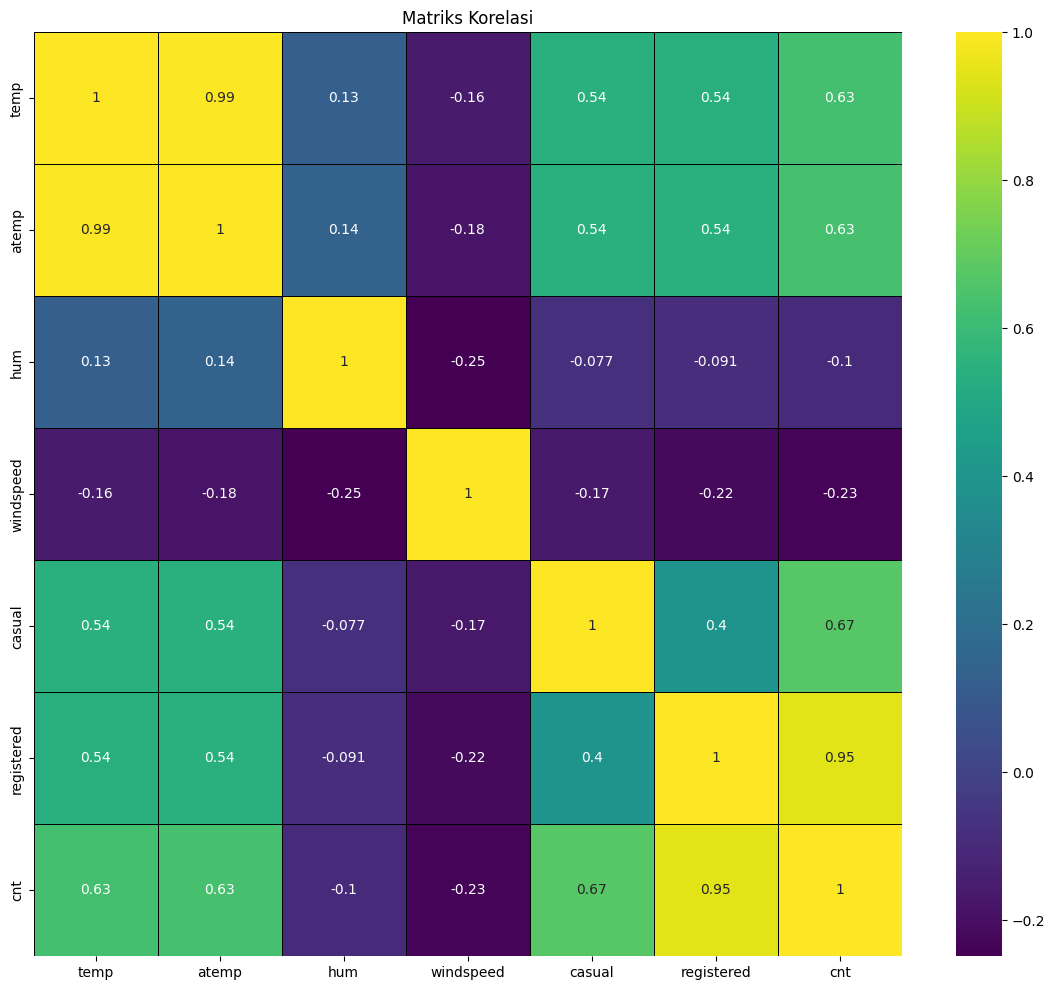

In [212]:
df = day_df.iloc[:, -7:]

# Menghitung matriks korelasi
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5, linecolor='black')
plt.title('Matriks Korelasi')
plt.show()

c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Us

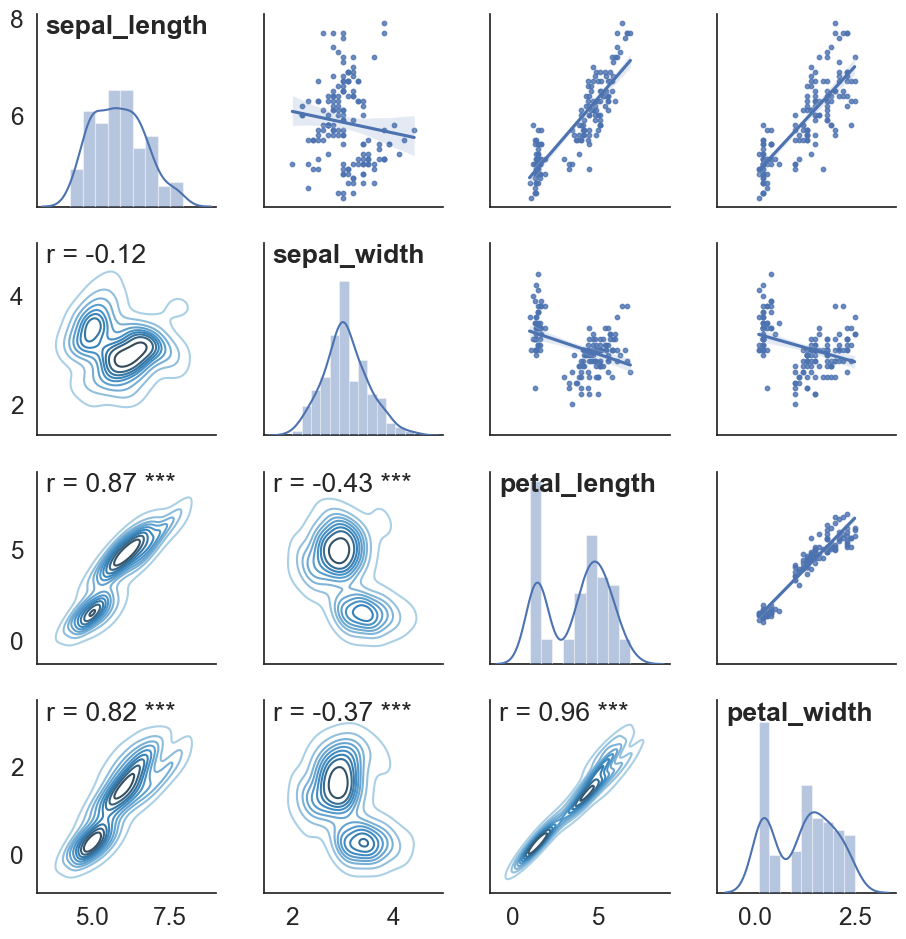

In [214]:
def corrfunc(x, y, **kws):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')
  
def cor_matrix(df):
  g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  g.map_upper(sns.regplot, scatter_kws={'s':10})
  g.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
  g.map_diag(annotate_colname)
  g.map_lower(sns.kdeplot, cmap='Blues_d')
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  return g

cor_matrix(iris)

In [215]:
cor_matrix(df)

c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Us